In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
SEED=42
random.seed(SEED)
np.random.seed(SEED)

# 경로 설정
DATA_DIR="../../data/raw/04_kaggle_dataset"
CLOSED_DIR=os.path.join(DATA_DIR, "Closed")
OPENED_DIR=os.path.join(DATA_DIR, "Opened")

# 이미지 경로 수집
closed_images=[os.path.join(CLOSED_DIR, fname) for fname in os.listdir(CLOSED_DIR) if fname.lower().endswith(".jpg")]
opened_images=[os.path.join(OPENED_DIR, fname) for fname in os.listdir(OPENED_DIR) if fname.lower().endswith(".jpg")]

print(f"Closed 이미지 수: {len(closed_images)}")
print(f"Opened 이미지 수: {len(opened_images)}")

Closed 이미지 수: 5002
Opened 이미지 수: 5037


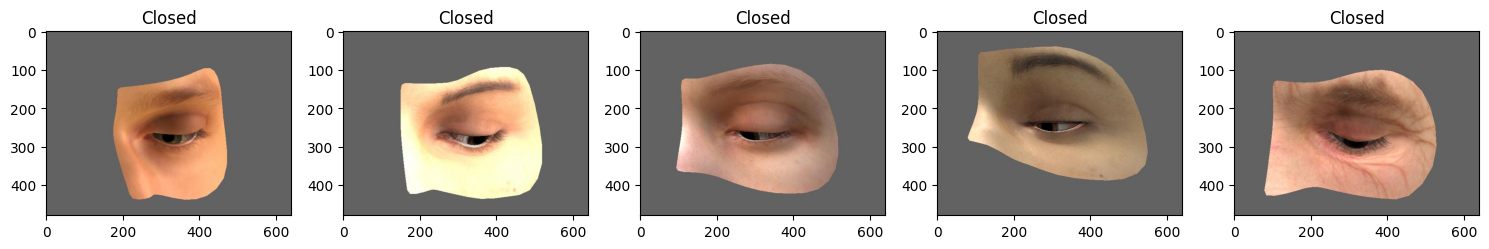

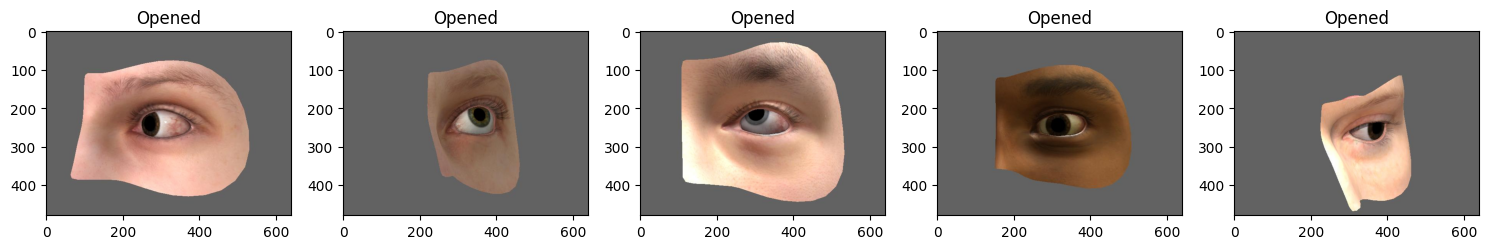

In [4]:
def show_samples(image_paths, title, num=5):
    sample_images=random.sample(image_paths, num)
    plt.figure(figsize=(15, 3))
    for i, img_path in enumerate(sample_images):
        img=Image.open(img_path)
        plt.subplot(1, num, i+1)
        plt.imshow(img)
        plt.title(title)
    plt.tight_layout()
    plt.show()

show_samples(closed_images, "Closed")
show_samples(opened_images, "Opened")

In [5]:
def check_image_shapes(image_paths):
    shapes=[]
    for path in image_paths:
        img=Image.open(path)
        shapes.append(img.size)  # (width, height)
    shapes=np.array(shapes)
    print("고유 이미지 사이즈:", np.unique(shapes, axis=0), f"(총 {len(shapes)}장)")

print("Closed 이미지 크기 분포:")
check_image_shapes(closed_images)

print("Opened 이미지 크기 분포:")
check_image_shapes(opened_images)

Closed 이미지 크기 분포:
고유 이미지 사이즈: [[640 480]] (총 5002장)
Opened 이미지 크기 분포:
고유 이미지 사이즈: [[640 480]] (총 5037장)


In [6]:
from tqdm import tqdm

RAW_DIR="../../data/raw/04_kaggle_dataset"
CLOSED_DIR=os.path.join(RAW_DIR, "Closed")
OPENED_DIR=os.path.join(RAW_DIR, "Opened")
SAVE_DIR="../../data/processed/04_kaggle_dataset"
SAVE_CLOSED=os.path.join(SAVE_DIR, "Closed")
SAVE_OPENED=os.path.join(SAVE_DIR, "Opened")
os.makedirs(SAVE_CLOSED, exist_ok=True)
os.makedirs(SAVE_OPENED, exist_ok=True)

In [7]:
IMG_SIZE=(224, 224)

def preprocess_and_save(image_paths, save_dir):
    for path in tqdm(image_paths):
        img=Image.open(path).convert("RGB")
        img_resized=img.resize(IMG_SIZE)
        save_path=os.path.join(save_dir, os.path.basename(path))
        img_resized.save(save_path)

closed_images=[os.path.join(CLOSED_DIR, f) for f in os.listdir(CLOSED_DIR) if f.lower().endswith(".jpg")]
opened_images=[os.path.join(OPENED_DIR, f) for f in os.listdir(OPENED_DIR) if f.lower().endswith(".jpg")]

print("Closed >>>")
preprocess_and_save(closed_images, SAVE_CLOSED)
print("Opened >>>")
preprocess_and_save(opened_images, SAVE_OPENED)

Closed >>>


100%|██████████| 5002/5002 [00:15<00:00, 330.06it/s]


Opened >>>


100%|██████████| 5037/5037 [00:15<00:00, 314.88it/s]
